In [1]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
import warnings
warnings.filterwarnings("ignore")

In [2]:
model = BayesianModel( [('location', 'speed'),
('network_type', 'speed'),
('speed', 'no_of_customers'),
('data_packs', 'no_of_customers')])

In [3]:
print("Nodes:", model.nodes(), end="\n") 
print("Edges:", model.edges(), end="\n")

Nodes: ['location', 'speed', 'network_type', 'no_of_customers', 'data_packs']
Edges: [('location', 'speed'), ('speed', 'no_of_customers'), ('network_type', 'speed'), ('data_packs', 'no_of_customers')]


In [6]:
cpd_location = TabularCPD('location', 2, [[0.7], [0.3]])
cpd_network_type = TabularCPD('network_type', 2, [[0.6], [0.4]])
cpd_speed= TabularCPD('speed', 2,
                      [[0.8, 0.6, 0.6, 0.3],
                       [0.2, 0.4, 0.4, 0.7]],
                      ['location', 'network_type'], [2, 2])
cpd_data_packs = TabularCPD('data_packs', 2, [[0.6], [0.4]])
cpd_no_of_customers = TabularCPD(
    'no_of_customers', 2,
    [[0.9, 0.5, 0.7, 0.1],
     [0.1, 0.5, 0.3, 0.9]],
 ['speed', 'data_packs'], [2, 2])

In [8]:
model.add_cpds(cpd_location, cpd_network_type,cpd_speed, cpd_data_packs
               ,cpd_no_of_customers)
print(cpd_location)
print(cpd_network_type)
print(cpd_speed)

+-------------+-----+
| location(0) | 0.7 |
+-------------+-----+
| location(1) | 0.3 |
+-------------+-----+
+-----------------+-----+
| network_type(0) | 0.6 |
+-----------------+-----+
| network_type(1) | 0.4 |
+-----------------+-----+
+--------------+-----------------+-----------------+-----------------+-----------------+
| location     | location(0)     | location(0)     | location(1)     | location(1)     |
+--------------+-----------------+-----------------+-----------------+-----------------+
| network_type | network_type(0) | network_type(1) | network_type(0) | network_type(1) |
+--------------+-----------------+-----------------+-----------------+-----------------+
| speed(0)     | 0.8             | 0.6             | 0.6             | 0.3             |
+--------------+-----------------+-----------------+-----------------+-----------------+
| speed(1)     | 0.2             | 0.4             | 0.4             | 0.7             |
+--------------+-----------------+--------------

In [9]:
print(cpd_data_packs)
print(cpd_no_of_customers)

+---------------+-----+
| data_packs(0) | 0.6 |
+---------------+-----+
| data_packs(1) | 0.4 |
+---------------+-----+
+--------------------+---------------+---------------+---------------+---------------+
| speed              | speed(0)      | speed(0)      | speed(1)      | speed(1)      |
+--------------------+---------------+---------------+---------------+---------------+
| data_packs         | data_packs(0) | data_packs(1) | data_packs(0) | data_packs(1) |
+--------------------+---------------+---------------+---------------+---------------+
| no_of_customers(0) | 0.9           | 0.5           | 0.7           | 0.1           |
+--------------------+---------------+---------------+---------------+---------------+
| no_of_customers(1) | 0.1           | 0.5           | 0.3           | 0.9           |
+--------------------+---------------+---------------+---------------+---------------+


In [10]:
model.check_model()

True

In [11]:
model.local_independencies(['data_packs', 'location','speed', 'no_of_customers','network_type' ])

(data_packs _|_ location, speed, network_type)
(location _|_ data_packs, network_type)
(speed _|_ data_packs | location, network_type)
(no_of_customers _|_ location, network_type | data_packs, speed)
(network_type _|_ location, data_packs)

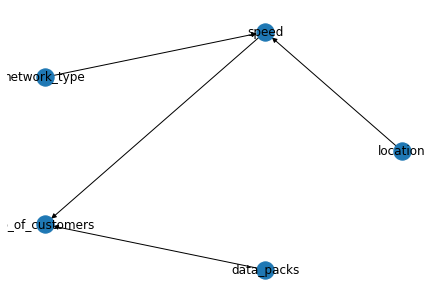

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
nx.draw_shell(model,with_labels=True)
plt.show()

In [13]:
#Create Inference Object of the model
model_inference = VariableElimination(model)
print(model_inference.query(variables=['location'])['location'])
print(model_inference.query(variables=['location', 'no_of_customers'])['no_of_customers'])

Eliminating: network_type: 100%|████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 286.48it/s]


TypeError: 'DiscreteFactor' object is not subscriptable

In [12]:
print(model_inference.query(variables=['no_of_customers'], 
                            elimination_order=['location', 'speed', 'network_type'])['no_of_customers'])

+--------------+-------------------+-----------------------------------+
| data_packs   | no_of_customers   |   phi(data_packs,no_of_customers) |
+==============+===================+===================================+
| data_packs_0 | no_of_customers_0 |                            0.4978 |
+--------------+-------------------+-----------------------------------+
| data_packs_0 | no_of_customers_1 |                            0.1022 |
+--------------+-------------------+-----------------------------------+
| data_packs_1 | no_of_customers_0 |                            0.1437 |
+--------------+-------------------+-----------------------------------+
| data_packs_1 | no_of_customers_1 |                            0.2563 |
+--------------+-------------------+-----------------------------------+


In [13]:
print(model_inference.query(variables=['no_of_customers'], evidence={'location': 0})['no_of_customers'])

+-------------------+------------------------+
| no_of_customers   |   phi(no_of_customers) |
+===================+========================+
| no_of_customers_0 |                 0.6616 |
+-------------------+------------------------+
| no_of_customers_1 |                 0.3384 |
+-------------------+------------------------+


In [14]:
print(model_inference.query(variables=['no_of_customers'], evidence={'location': 1, 'network_type': 0})['no_of_customers'])

+-------------------+------------------------+
| no_of_customers   |   phi(no_of_customers) |
+===================+========================+
| no_of_customers_0 |                 0.6280 |
+-------------------+------------------------+
| no_of_customers_1 |                 0.3720 |
+-------------------+------------------------+


In [15]:
print(model_inference.query(
    variables=['no_of_customers'], 
    evidence={'location': 1}, 
    elimination_order=['network_type', 'speed'])['no_of_customers'])

+-------------------+--------------+-----------------------------------+
| no_of_customers   | data_packs   |   phi(no_of_customers,data_packs) |
+===================+==============+===================================+
| no_of_customers_0 | data_packs_0 |                            0.4776 |
+-------------------+--------------+-----------------------------------+
| no_of_customers_0 | data_packs_1 |                            0.1168 |
+-------------------+--------------+-----------------------------------+
| no_of_customers_1 | data_packs_0 |                            0.1224 |
+-------------------+--------------+-----------------------------------+
| no_of_customers_1 | data_packs_1 |                            0.2832 |
+-------------------+--------------+-----------------------------------+


In [16]:
print(model_inference.map_query(variables=['no_of_customers'], evidence={'speed': 1, 'network_type': 0}))

{'no_of_customers': 1}


In [17]:
induced_graph1 = model_inference.induced_graph(['speed', 'location', 'no_of_customers',
                                                'network_type', 'data_packs']) 
print("Nodes:" , induced_graph1.nodes(), end="\n") 
print("Edges:" ,induced_graph1.edges())

Nodes: ['network_type', 'location', 'no_of_customers', 'data_packs', 'speed']
Edges: [('network_type', 'location'), ('network_type', 'no_of_customers'), ('network_type', 'data_packs'), ('network_type', 'speed'), ('location', 'no_of_customers'), ('location', 'data_packs'), ('location', 'speed'), ('no_of_customers', 'data_packs'), ('no_of_customers', 'speed'), ('data_packs', 'speed')]


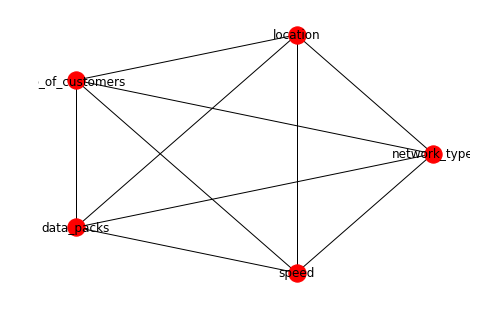

In [18]:
nx.draw_shell(induced_graph1,with_labels=True)
plt.show()

In [19]:
induced_graph2 = model_inference.induced_graph(['data_packs', 'speed','no_of_customers','network_type', 'location' ])
print("Nodes:" , induced_graph2.nodes(), end="\n") 
print("Edges:" ,induced_graph2.edges())

Nodes: ['network_type', 'location', 'speed', 'no_of_customers', 'data_packs']
Edges: [('network_type', 'location'), ('network_type', 'speed'), ('network_type', 'no_of_customers'), ('location', 'speed'), ('location', 'no_of_customers'), ('speed', 'no_of_customers'), ('speed', 'data_packs'), ('no_of_customers', 'data_packs')]


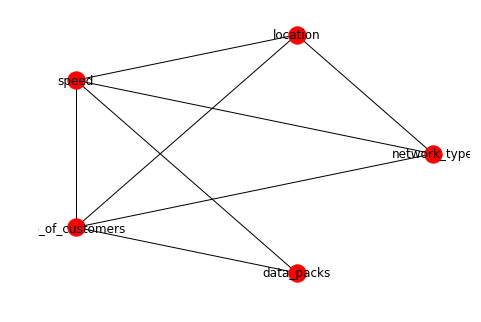

In [20]:
nx.draw_shell(induced_graph2,with_labels=True) 
plt.show()